<a href="https://colab.research.google.com/github/Fredooooooo/JSC270_Assg4/blob/main/Copy_of_JSC270_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
api_key = 'RnHS3Y3lkrv9pzkHVFcVYVArH'
api_secret_key = 'xLMxTxhEHluPlcsPgb2rur07hBR4qSuzGdIVhJg0hpEiR1nTBm'
access_key = '1376070608950267904-AlJkcNLLxsAByp9NmFU854synmuzq5'
access_secret = 'dtH18I0v8Ob44BAUXhrJB9TNvnFfQykBafXY4fl4JtdJB'

In [ ]:
import re
import numpy as np
import pandas as pd 
import io
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

## Section 1

**Load datasets**

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving covid-tweets-train.csv to covid-tweets-train (1).csv


In [ ]:
train_data = pd.read_csv(io.BytesIO(data_to_load['covid-tweets-train.csv']), encoding = 'latin1') 
print(train_data.head(5))

   Unnamed: 0                                      OriginalTweet Sentiment
0           0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...         1
1           1  advice Talk to your neighbours family to excha...         2
2           2  Coronavirus Australia: Woolworths to give elde...         2
3           3  My food stock is not the only one which is emp...         2
4           4  Me, ready to go at supermarket during the #COV...         0


In [ ]:
data_to_load = files.upload()

Saving covid-tweets-test.csv to covid-tweets-test (1).csv


In [ ]:
test_data = pd.read_csv(io.BytesIO(data_to_load['covid-tweets-test.csv']), encoding = 'latin1') 
print(test_data.head(5))

   Unnamed: 0                                      OriginalTweet  Sentiment
0           0  TRENDING: New Yorkers encounter empty supermar...          0
1           1  When I couldn't find hand sanitizer at Fred Me...          2
2           2  Find out how you can protect yourself and love...          2
3           3  #Panic buying hits #NewYork City as anxious sh...          0
4           4  #toiletpaper #dunnypaper #coronavirus #coronav...          1


In [ ]:
def tokenization(data, col):
  nltk.download('punkt')

  # Create a new column in our DF that contains token lists instead of raw text
  data['tokens'] = data[col].apply(nltk.word_tokenize)

In [ ]:
def remove_url(data, col, n):
  lst = []
  for i in range(0,n):
    lst.append(re.sub(r'http\S+', '', data[col][i]))
  data['url_removed'] = lst

In [ ]:
def evaluate(X_test, y_test, model):
  y_preds = model.predict(X_test)

  print('Test accuracy with our model:',accuracy_score(y_test,y_preds))

**(A)**

In [ ]:
nega = 0
neut = 0
posi = 0
num_train = len(train_data)
num_test = len(test_data)
for sentiment in train_data['Sentiment']:
  if sentiment == '0':
    nega += 1
  elif sentiment == '1':
    neut += 1
  elif sentiment == '2':
    posi += 1
print('the proportion of negative sentiment: ', nega/num_train)
print('the proportion of neutral sentiment: ', neut/num_train)
print('the proportion of positive sentiment: ', posi/num_train)

the proportion of negative sentiment:  0.374122220872312
the proportion of neutral sentiment:  0.18738913862228163
the proportion of positive sentiment:  0.4383914469687766


**(B)**

In [ ]:
tokenization(train_data, 'OriginalTweet')
tokenization(test_data, 'OriginalTweet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(train_data['tokens'].head(5))
print(test_data['tokens'].head(5))

0    [@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, :, Woolworths, to, gi...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ,, ready, to, go, at, supermarket, during...
Name: tokens, dtype: object
0    [TRENDING, :, New, Yorkers, encounter, empty, ...
1    [When, I, could, n't, find, hand, sanitizer, a...
2    [Find, out, how, you, can, protect, yourself, ...
3    [#, Panic, buying, hits, #, NewYork, City, as,...
4    [#, toiletpaper, #, dunnypaper, #, coronavirus...
Name: tokens, dtype: object


**(C)**

In [ ]:
remove_url(train_data, 'OriginalTweet', num_train)
tokenization(train_data, 'url_removed')
train_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,OriginalTweet,Sentiment,tokens,url_removed
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...",@MeNyrbie @Phil_Gahan @Chrisitv and and
1,1,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...",advice Talk to your neighbours family to excha...
2,2,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia, :, Woolworths, to, gi...",Coronavirus Australia: Woolworths to give elde...
3,3,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...",My food stock is not the only one which is emp...
4,4,"Me, ready to go at supermarket during the #COV...",0,"[Me, ,, ready, to, go, at, supermarket, during...","Me, ready to go at supermarket during the #COV..."
...,...,...,...,...,...
41150,41150,Airline pilots offering to stock supermarket s...,1,"[Airline, pilots, offering, to, stock, superma...",Airline pilots offering to stock supermarket s...
41151,41151,Response to complaint not provided citing COVI...,0,"[Response, to, complaint, not, provided, citin...",Response to complaint not provided citing COVI...
41152,41152,You know itÃÂs getting tough when @KameronWi...,2,"[You, know, itÃÂs, getting, tough, when, @, ...",You know itÃÂs getting tough when @KameronWi...
41153,41153,Is it wrong that the smell of hand sanitizer i...,1,"[Is, it, wrong, that, the, smell, of, hand, sa...",Is it wrong that the smell of hand sanitizer i...


In [ ]:
remove_url(test_data, 'OriginalTweet', num_test)
tokenization(test_data, 'url_removed')
test_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,OriginalTweet,Sentiment,tokens,url_removed
0,0,TRENDING: New Yorkers encounter empty supermar...,0,"[TRENDING, :, New, Yorkers, encounter, empty, ...",TRENDING: New Yorkers encounter empty supermar...
1,1,When I couldn't find hand sanitizer at Fred Me...,2,"[When, I, could, n't, find, hand, sanitizer, a...",When I couldn't find hand sanitizer at Fred Me...
2,2,Find out how you can protect yourself and love...,2,"[Find, out, how, you, can, protect, yourself, ...",Find out how you can protect yourself and love...
3,3,#Panic buying hits #NewYork City as anxious sh...,0,"[#, Panic, buying, hits, #, NewYork, City, as,...",#Panic buying hits #NewYork City as anxious sh...
4,4,#toiletpaper #dunnypaper #coronavirus #coronav...,1,"[#, toiletpaper, #, dunnypaper, #, coronavirus...",#toiletpaper #dunnypaper #coronavirus #coronav...
...,...,...,...,...,...
3793,3793,Meanwhile In A Supermarket in Israel -- People...,2,"[Meanwhile, In, A, Supermarket, in, Israel, --...",Meanwhile In A Supermarket in Israel -- People...
3794,3794,Did you panic buy a lot of non-perishable item...,0,"[Did, you, panic, buy, a, lot, of, non-perisha...",Did you panic buy a lot of non-perishable item...
3795,3795,Asst Prof of Economics @cconces was on @NBCPhi...,1,"[Asst, Prof, of, Economics, @, cconces, was, o...",Asst Prof of Economics @cconces was on @NBCPhi...
3796,3796,Gov need to do somethings instead of biar je r...,0,"[Gov, need, to, do, somethings, instead, of, b...",Gov need to do somethings instead of biar je r...


(D)

In [ ]:
##### Convert tokens into lowercase ####
lowercase_tokens = []
# Create a list of lists with what we want
for row in train_data['tokens']:
  lowercase_tokens.append([t.lower() for t in row])
# add the new info to our df
train_data['lowercase_tokens'] = lowercase_tokens

print(train_data['lowercase_tokens'].head(5))

0    [@, menyrbie, @, phil_gahan, @, chrisitv, and,...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, :, woolworths, to, gi...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ,, ready, to, go, at, supermarket, during...
Name: lowercase_tokens, dtype: object


In [ ]:
##### Let's remove punctuation #####

# Note we've been keeping different columns for different steps (not necessary)
list(train_data)

# Same process as before
tokens_no_punct = []
# Create a list of lists with what we want
for row in train_data['lowercase_tokens']:
  tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
# add the new info to our df
train_data['tokens_no_punct'] = tokens_no_punct

print(train_data['tokens_no_punct'].head(5))

0     [, menyrbie, , phil_gahan, , chrisitv, and, and]
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, , woolworths, to, giv...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, , ready, to, go, at, supermarket, during,...
Name: tokens_no_punct, dtype: object


In [ ]:
##### Convert tokens into lowercase ####
lowercase_tokens = []
# Create a list of lists with what we want
for row in test_data['tokens']:
  lowercase_tokens.append([t.lower() for t in row])
# add the new info to our df
test_data['lowercase_tokens'] = lowercase_tokens

print(test_data['lowercase_tokens'].head(5))

0    [trending, :, new, yorkers, encounter, empty, ...
1    [when, i, could, n't, find, hand, sanitizer, a...
2    [find, out, how, you, can, protect, yourself, ...
3    [#, panic, buying, hits, #, newyork, city, as,...
4    [#, toiletpaper, #, dunnypaper, #, coronavirus...
Name: lowercase_tokens, dtype: object


In [ ]:
##### Let's remove punctuation #####

# Note we've been keeping different columns for different steps (not necessary)
list(test_data)

# Same process as before
tokens_no_punct = []
# Create a list of lists with what we want
for row in test_data['lowercase_tokens']:
  tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
# add the new info to our df
test_data['tokens_no_punct'] = tokens_no_punct

print(test_data['tokens_no_punct'].head(5))

0    [trending, , new, yorkers, encounter, empty, s...
1    [when, i, could, nt, find, hand, sanitizer, at...
2    [find, out, how, you, can, protect, yourself, ...
3    [, panic, buying, hits, , newyork, city, as, a...
4    [, toiletpaper, , dunnypaper, , coronavirus, ,...
Name: tokens_no_punct, dtype: object


(E)

In [ ]:
#### Stemming tokens ####
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed_tokens = []
for row in train_data['tokens_no_punct']:
  stemmed_tokens.append([stemmer.stem(t) for t in row])

train_data['stemmed_tokens'] = stemmed_tokens
print('After stemming:\n', train_data['stemmed_tokens'].head(3))

After stemming:
 0      [, menyrbi, , phil_gahan, , chrisitv, and, and]
1    [advic, talk, to, your, neighbour, famili, to,...
2    [coronaviru, australia, , woolworth, to, give,...
Name: stemmed_tokens, dtype: object


In [ ]:
#### Stemming tokens ####
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed_tokens = []
for row in test_data['tokens_no_punct']:
  stemmed_tokens.append([stemmer.stem(t) for t in row])

test_data['stemmed_tokens'] = stemmed_tokens
print('After stemming:\n', test_data['stemmed_tokens'].head(3))

After stemming:
 0    [trend, , new, yorker, encount, empti, superma...
1    [when, i, could, nt, find, hand, sanit, at, fr...
2    [find, out, how, you, can, protect, yourself, ...
Name: stemmed_tokens, dtype: object


In [ ]:
# Let's use the TFIDF counts for modelling
X_train = tfs_train.toarray()
X_test = tfs_test.toarray()
y_train = y_train.tolist()
y_test = y_test.tolist()
# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_train_preds = nb.predict(X_train)

# Get fitted values from test set
y_test_preds = nb.predict(X_test)

# Print train and test errors
train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

print('Train Accuracy: ',train_acc)
print('Test Accuracy: ',test_acc)from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed_tokens = []
for row in df['tokens_no_sw']:
  stemmed_tokens.append([stemmer.stem(t) for t in row])

df['stemmed_tokens'] = stemmed_tokens
print('Before stemming:\n', df['tokens_no_sw'].head(3))
print('After stemming:\n', df['stemmed_tokens'].head(3))

SyntaxError: ignored

In [ ]:
# Drop some intermediate columns
list(train_data)
train_data = train_data.drop(['tokens','lowercase_tokens', 'tokens_no_punct','url_removed'],axis=1)

print('After removal:\n', list(train_data))

no_blanks = []
for row in train_data['stemmed_tokens']:
  no_blanks.append([t for t in row if t != ''])
train_data['tokens'] = no_blanks

print(train_data['tokens'].head(5))

# drop the last intermediate column
train_data = train_data.drop(['stemmed_tokens'], axis = 1)

# Now we should have only the label, original text, and cleaned token lists
print('Current Columns:\n',list(train_data))

After removal:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'stemmed_tokens']
0            [menyrbi, phil_gahan, chrisitv, and, and]
1    [advic, talk, to, your, neighbour, famili, to,...
2    [coronaviru, australia, woolworth, to, give, e...
3    [my, food, stock, is, not, the, onli, one, whi...
4    [me, readi, to, go, at, supermarket, dure, the...
Name: tokens, dtype: object
Current Columns:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens']


In [ ]:
# Drop some intermediate columns
test_data = test_data.drop(['tokens','lowercase_tokens', 'tokens_no_punct','url_removed'],axis=1)

print('After removal:\n', list(test_data))

no_blanks = []
for row in test_data['stemmed_tokens']:
  no_blanks.append([t for t in row if t != ''])
test_data['tokens'] = no_blanks


# drop the last intermediate column
test_data = test_data.drop(['stemmed_tokens'], axis = 1)

# Now we should have only the label, original text, and cleaned token lists
print('Current Columns:\n',list(test_data))

After removal:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'stemmed_tokens']
Current Columns:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens']


(F)

In [ ]:
##### Time to remove Stopwords #####

from nltk.corpus import stopwords
nltk.download('stopwords')
# print the top 100 most popular english words
sw = stopwords.words('english')[:100]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Now let's remove them
tokens_no_sw = []
for row in train_data['tokens']:
  tokens_no_sw.append([w for w in row if w not in sw])
# Add column to df
train_data['tokens'] = tokens_no_sw

# Print some examples
print(train_data['tokens'].tail(5))

41150    [airlin, pilot, offer, stock, supermarket, she...
41151    [respons, complaint, not, provid, cite, covid1...
41152    [know, itãâ, get, tough, when, kameronwild, ra...
41153    [wrong, smell, hand, sanit, start, turn, coron...
41154    [tartiicat, well, newus, rift, s, go, 70000, a...
Name: tokens, dtype: object


In [ ]:
# Now let's remove them
tokens_no_sw = []
for row in test_data['tokens']:
  tokens_no_sw.append([w for w in row if w not in sw])
# Add column to df
test_data['tokens'] = tokens_no_sw

# Print some examples
print(test_data['tokens'].tail(5))

3793    [meanwhil, supermarket, israel, peopl, danc, s...
3794    [panic, buy, lot, nonperish, item, echo, need,...
3795    [asst, prof, econom, cconc, wa, nbcphiladelphi...
3796    [gov, need, someth, instead, biar, je, rakyat,...
3797    [forestandpap, member, commit, safeti, employe...
Name: tokens, dtype: object


（G）

In [ ]:
for i in range(0, len(train_data['Sentiment'])):
  if type(train_data['Sentiment'][i]) == str:
    if train_data['Sentiment'][i].isnumeric():
      train_data['Sentiment'][i] = int(train_data['Sentiment'][i])
    else:
      train_data['Sentiment'][i] = 1
for i in range(0, len(test_data['Sentiment'])):
  if type(test_data['Sentiment'][i]) == str:
    if test_data['Sentiment'][i].isnumeric():
      test_data['Sentiment'][i] = int(test_data['Sentiment'][i])
    else:
      test_data['Sentiment'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(0, len(test_data['Sentiment'])):
  if np.isnan(int(test_data['Sentiment'][i])):
    test_data['Sentiment'][i] = 1
  else:
    test_data['Sentiment'][i] = int(test_data['Sentiment'][i])

X_train, y_train = train_data['tokens'].to_numpy(), train_data['Sentiment'].to_numpy()
X_test, y_test = test_data['tokens'].to_numpy(), test_data['Sentiment'].to_numpy()
def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Remember this output is a Scipy Sparse Array
counts_train = count_vec.fit_transform(X_train)
counts_test = count_vec.fit_transform(X_test)

X_train = counts_train.toarray()
X_test = counts_test.toarray()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for i in range(0, len(y_train)):
  if np.isnan(y_train[i]):
    y_train[i] = 1


y_test = y_test.tolist()

In [ ]:
y_train = y_train.tolist()

In [ ]:
print(len(count_vec.vocabulary_))

1000


**(H)**

In [ ]:
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_train_preds = nb.predict(X_train)

# Get fitted values from test set
y_test_preds = nb.predict(X_test)

# Print train and test errors
train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

print('Train Accuracy: ',train_acc)
print('Test Accuracy: ',test_acc)

Train Accuracy:  0.68234722390961
Test Accuracy:  0.42338072669826227


In [ ]:
for lst in test_data['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: ignored

In [ ]:
for lst in train_data['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**(I)**

No, because ROC curve is not suitable for labels involving multiple classes

**(J)**

In [ ]:
X_train, y_train = train_data['tokens'].to_numpy(), train_data['Sentiment'].to_numpy()
X_test, y_test = test_data['tokens'].to_numpy(), test_data['Sentiment'].to_numpy()
def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Remember this output is a Scipy Sparse Array
counts_train = count_vec.fit_transform(X_train)
counts_test = count_vec.fit_transform(X_test)
#### TF-IDF Vectorize ####

# Note that smoothing is done by default
tfidf = TfidfTransformer()

tfs_train = tfidf.fit_transform(counts_train)
tfs_test = tfidf.fit_transform(counts_test)

# Let's use the TFIDF counts for modelling
X_train = tfs_train.toarray()
X_test = tfs_test.toarray()
print(X_test)
y_train = y_train.tolist()
y_test = y_test.tolist()
# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_train_preds = nb.predict(X_train)

# Get fitted values from test set
y_test_preds = nb.predict(X_test)

# Print train and test errors
train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

print('Train Accuracy: ',train_acc)
print('Test Accuracy: ',test_acc)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Train Accuracy:  0.6654841453043373
Test Accuracy:  0.42627698788836227


**(K)**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lem_tokens = []
for row in train_data['tokens']:
  lem_tokens.append([lemmatizer.lemmatize(t) for t in row])

train_data['lem_tokens'] = lem_tokens

# Print results
print(train_data['lem_tokens'].head(5))
## For test data
lemmatizer = WordNetLemmatizer()
lem_tokens = []
for row in test_data['tokens']:
  lem_tokens.append([lemmatizer.lemmatize(t) for t in row])

test_data['lem_tokens'] = lem_tokens

# Print results
print(test_data['lem_tokens'].head(5))

tokens_no_sw = []
for row in train_data['tokens']:
  tokens_no_sw.append([w for w in row if w not in sw])
# Add column to df
train_data['tokens'] = tokens_no_sw

tokens_no_sw = []
for row in test_data['tokens']:
  tokens_no_sw.append([w for w in row if w not in sw])
# Add column to df
test_data['tokens'] = tokens_no_sw

X_train, y_train = train_data['tokens'].to_numpy(), train_data['Sentiment'].to_numpy()
X_test, y_test = test_data['tokens'].to_numpy(), test_data['Sentiment'].to_numpy()
def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Remember this output is a Scipy Sparse Array
counts_train = count_vec.fit_transform(X_train)
counts_test = count_vec.fit_transform(X_test)
#### TF-IDF Vectorize ####

# Note that smoothing is done by default
tfidf = TfidfTransformer()

tfs_train = tfidf.fit_transform(counts_train)
tfs_test = tfidf.fit_transform(counts_test)

# Let's use the TFIDF counts for modelling
X_train = tfs_train.toarray()
X_test = tfs_test.toarray()
y_train = y_train.tolist()
y_test = y_test.tolist()
# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_train_preds = nb.predict(X_train)

# Get fitted values from test set
y_test_preds = nb.predict(X_test)

# Print train and test errors
train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

print('Train Accuracy: ',train_acc)
print('Test Accuracy: ',test_acc)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0                      [menyrbi, phil_gahan, chrisitv]
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronaviru, australia, woolworth, give, elder...
3    [food, stock, not, onli, one, empti, plea, nt,...
4    [readi, go, supermarket, dure, covid19, outbre...
Name: lem_tokens, dtype: object
0    [trend, new, yorker, encount, empti, supermark...
1    [when, could, nt, find, hand, sanit, fred, mey...
2     [find, how, can, protect, love, one, coronaviru]
3    [panic, buy, hit, newyork, citi, anxiou, shopp...
4    [toiletpap, dunnypap, coronaviru, coronavirusa...
Name: lem_tokens, dtype: object
Train Accuracy:  0.6654841453043373
Test Accuracy:  0.42627698788836227


## Section 2

In [ ]:
import tweepy as tw
# Use credentials to authorize access
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)
search_words = ' -filter:retweets'
date_since = "2021-04-02"

#Collect tweets (here, I get only 20)
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1000)

# The result is an iterable
a = []
b = []
for tweet in tweets:
  a.append(tweet.text)
  b.append(tweet.user.followers_count)

In [ ]:
import pandas as pd
import re

# tweet_list = [tweet.text for tweet in tweets]
df = pd.DataFrame(a, columns = ['tweet'])
df['followers'] = b
print(df.count())

tweet        1000
followers    1000
dtype: int64


In [ ]:
handle_regex = '@[A-Za-z|0-9|_]+'

d = []
for row in df['tweet']:
  d.append(re.sub(handle_regex,'', row))

df['tweet'] = d
df.head()

,tweet,followers
0,"Kid at heart, Yes☺️",145
1,im trolling bro i dont care what so ever cool...,394
2,Veintiocho. \nHagan stream y Shazam.\nI vote f...,133
3,No problem,160
4,if having 6 drops is your reasoning for why ...,448


In [ ]:
c = []
for x in df['followers']:
  if 0 <= x <= 100:
    c.append(0)
  elif 100 < x <= 10000:
    c.append(1)
  else:
    c.append(2)
df['labels'] = c
df.head()

,tweet,followers,labels
0,"Kid at heart, Yes☺️",145,1
1,im trolling bro i dont care what so ever cool...,394,1
2,Veintiocho. \nHagan stream y Shazam.\nI vote f...,133,1
3,No problem,160,1
4,if having 6 drops is your reasoning for why ...,448,1


In [ ]:
low_proportion = df['labels'].tolist().count(0)
medium_proportion = df['labels'].tolist().count(1)
high_proportion = df['labels'].tolist().count(2)
print(low_proportion, medium_proportion, high_proportion)
print(df.followers.mean)

289 686 25
<bound method Series.mean of 0       145
1       394
2       133
3       160
4       448
       ... 
995       3
996     181
997    1095
998     393
999     114
Name: followers, Length: 1000, dtype: int64>


In [ ]:
import nltk
# Download the tokenizer
nltk.download('punkt')

# Create a new column in our DF that contains token lists instead of raw text
df['tokens'] = df['tweet'].apply(nltk.word_tokenize)

print(df['tokens'].head(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0                           [Kid, at, heart, ,, Yes☺️]
1    [im, trolling, bro, i, dont, care, what, so, e...
2    [Veintiocho, ., Hagan, stream, y, Shazam, ., I...
3                                        [No, problem]
4    [if, having, 6, drops, is, your, reasoning, fo...
Name: tokens, dtype: object


In [ ]:
##### Convert tokens into lowercase ####
lowercase_tokens = []
# Create a list of lists with what we want
for row in df['tokens']:
  lowercase_tokens.append([t.lower() for t in row])
# add the new info to our df
df['lowercase_tokens'] = lowercase_tokens

print(df['lowercase_tokens'].head(5))

0                           [kid, at, heart, ,, yes☺️]
1    [im, trolling, bro, i, dont, care, what, so, e...
2    [veintiocho, ., hagan, stream, y, shazam, ., i...
3                                        [no, problem]
4    [if, having, 6, drops, is, your, reasoning, fo...
Name: lowercase_tokens, dtype: object


In [ ]:
##### Let's remove punctuation #####

# Note we've been keeping different columns for different steps (not necessary)
list(df)

# Same process as before
tokens_no_punct = []
# Create a list of lists with what we want
for row in df['lowercase_tokens']:
  tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
# add the new info to our df
df['tokens_no_punct'] = tokens_no_punct

print(df['tokens_no_punct'].head(5))

0                              [kid, at, heart, , yes]
1    [im, trolling, bro, i, dont, care, what, so, e...
2    [veintiocho, , hagan, stream, y, shazam, , i, ...
3                                        [no, problem]
4    [if, having, 6, drops, is, your, reasoning, fo...
Name: tokens_no_punct, dtype: object


In [ ]:
##### Time to remove Stopwords #####
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')[:75]
tokens_no_sw = []
for row in df['tokens_no_punct']:
  tokens_no_sw.append([w for w in row if w not in sw])
# Add column to df
df['tokens_no_sw'] = tokens_no_sw

# Print some examples
print(df['tokens_no_sw'].head(5))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0                                  [kid, heart, , yes]
1    [im, trolling, bro, dont, care, so, ever, cool...
2    [veintiocho, , hagan, stream, y, shazam, , vot...
3                                        [no, problem]
4    [6, drops, reasoning, why, isn, , t, top, 10, ...
Name: tokens_no_sw, dtype: object


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lem_tokens = []
for row in df['tokens_no_sw']:
  lem_tokens.append([lemmatizer.lemmatize(t) for t in row])

df['lem_tokens'] = lem_tokens

# Print results
print(df['lem_tokens'].head(5))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0                                  [kid, heart, , yes]
1    [im, trolling, bro, dont, care, so, ever, cool...
2    [veintiocho, , hagan, stream, y, shazam, , vot...
3                                        [no, problem]
4    [6, drop, reasoning, why, isn, , t, top, 10, ,...
Name: lem_tokens, dtype: object


In [ ]:
# Drop some intermediate columns
list(df)
df = df.drop(['tokens','lowercase_tokens', 'tokens_no_punct','tokens_no_sw','stemmed_tokens'], axis = 1)

print('After removal:\n', list(df))

# Remove blank tokens
no_blanks = []
for row in df['lem_tokens']:
  no_blanks.append([t for t in row if t != ''])
df['tokens'] = no_blanks

print(df['tokens'].head(5))

# drop the last intermediate column
df = df.drop(['lem_tokens'], axis = 1)

# Now we should have only the label, original text, and cleaned token lists
print('Current Columns:\n',list(df))

After removal:
 ['tweet', 'followers', 'labels', 'lem_tokens']
0                                    [kid, heart, yes]
1    [im, trolling, bro, dont, care, so, ever, cool...
2    [veintiocho, hagan, stream, y, shazam, vote, h...
3                                        [no, problem]
4    [6, drop, reasoning, why, isn, t, top, 10, the...
Name: tokens, dtype: object
Current Columns:
 ['tweet', 'followers', 'labels', 'tokens']


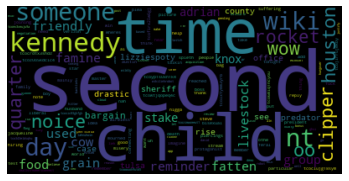

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
popular = df['labels'] > 1
df_pop = df[popular]
text = []
for lst in df_pop['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

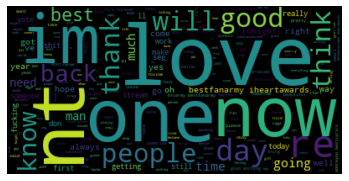

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
popular = df['labels'] == 1
df_less_pop = df[popular]
text = []
for lst in df_less_pop['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

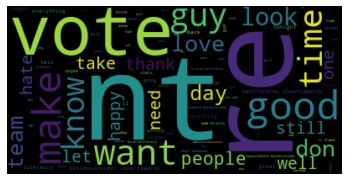

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
popular = df['labels'] < 1
df_lst_pop = df[popular]
text = []
for lst in df_lst_pop['tokens']:
  text.extend(lst)
text = ' '.join(text)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_pop.head()

,tweet,followers,labels,tokens
26,oo this is noice,27069,2,"[oo, noice]"
53,The Clippers had a 41-10 second quarter agains...,16748,2,"[clipper, 4110, second, quarter, against, hous..."
71,Just a friendly reminder that grains are a fam...,11886,2,"[just, friendly, reminder, grain, famine, food..."
75,Group 3 Adrian Knox Stakes - #13 Bargain \n\n...,10775,2,"[group, 3, adrian, knox, stake, 13, bargain, l..."
86,Tulsa County Sheriff's Office sees drastic ris...,76772,2,"[tulsa, county, sheriff, s, office, see, drast..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Separate labels from features, converting to numpy arrays
X, y = df['tokens'].to_numpy(), df['labels'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None)

# Remember this output is a Scipy Sparse Array
counts = count_vec.fit_transform(X)
print(counts.toarray())

# Print the names of each of the features (1000 total))
print(count_vec.get_feature_names())
# Print this mapping as dictionary
print(count_vec.vocabulary_)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['010', '1', '10', '100', '100k', '1010', '10k', '10mเมนชนของคณบกกลฟ', '11', '12', '13', '13अपरल_नववरष', '14', '15', '152', '15x', '16', '17', '18', '19', '1939', '1969', '1mlikesforpushparajintro', '1st', '2', '20', '2000', '2011', '2019', '2020', '2021', '20210410', '2022', '2070', '20k', '20th', '21', '21000', '21st', '22', '2200', '221', '24', '25', '28', '2nd', '3', '30', '33', '34', '35', '350', '3bed', '3d', '4', '4110', '46', '4744', '48', '4am', '5', '50', '53', '54', '555', '6', '600', '7', '70', '74bn', '75', '7x', '85', '8600k', '89fm', '9', '911', '_', 'aaa', 'aap', 'ab', 'able', 'about', 'above', 'abramov', 'abril', 'absolute', 'absolutely', 'abt', 'abusive', 'ac', 'accident', 'accomplishment', 'account', 'acct', 'achievement', 'acid', 'acquisition', 'across', 'act', 'activate', 'actual', 'actually', 'ad', 'add', 'additional', 'address', 'admin', 'admini

In [ ]:
#### TF-IDF Vectorize ####

# Note that smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

# Let's use the TFIDF counts for modelling
X = tfs.toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# First three rows of training features and labels

Test accuracy with simple Naive Bayes: 0.69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.69      1.00      0.82       138
           2       0.00      0.00      0.00         2

    accuracy                           0.69       200
   macro avg       0.23      0.33      0.27       200
weighted avg       0.48      0.69      0.56       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


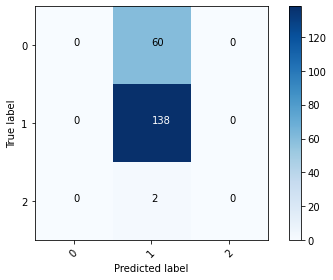

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))

# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label = 1)

# plt.plot(fpr,tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operator Characteristic (ROC) Curve for RF')
# plt.show()

labels = [0,1,2]
print(classification_report(y_test, y_preds, labels)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_preds, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]): 
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model object
rfclf = RandomForestClassifier(n_estimators = 50, max_depth = 6, random_state = 10, max_features='log2')

# Fit the model to the data
rfclf.fit(X_train, y_train)

# Get fitted values from test set
y_test_preds_rf = rfclf.predict(X_test)

test_acc = accuracy_score(y_test, y_test_preds_rf)

print('Test Accuracy: ',test_acc)

Test Accuracy:  0.69


**export to csv**

In [123]:
df.to_csv(r'C:\Users\HP\Documents\output.csv', index=False)